# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*



## Polynomial model generalization exercises

Tasks: 

1. Evaluate infulence of the training data size on model generalization. 

2. Evaluate infulence of data noise on the model generalization. 

3. Generalize the polynomial model by simplification from high degree (top-down approach).


In [280]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
np.random.seed(0)

### Sample data

In [237]:
# Generate data 
def fun(x, noise):
    """Underlying function"""
    return .6 * np.sin(x*6) + x + (x ** .8) * noise

# Generate training & testing data
def train_test_data(n_samples, noise_factor): 
    """Function to generate training and testing sets"""
    
    # train 
    np.random.seed(0)
    X_train = np.sort(np.random.rand(n_samples))
    noise_train = np.random.rand(n_samples) * noise_factor
    y_train = fun(X_train, noise_train) 
    X_train = X_train.reshape(-1, 1)
    
    # test 
    X_test = np.sort(np.random.rand(n_samples))
    noise_test = np.random.rand(n_samples) * noise_factor
    y_test = fun(X_test, noise_test)
    X_test = X_test.reshape(-1, 1)
    
    return X_train, y_train, X_test, y_test

In [238]:
# prepare data 
n_samples = 10
noise_factor = 0.9

X_train, y_train, X_test, y_test = train_test_data(n_samples, noise_factor)

In [239]:
# Underlaying function
X_fun = np.linspace(0, 1, 100)
noise_fun = np.ones(100) / 2. * noise_factor
y_fun = fun(X_fun, noise_fun)

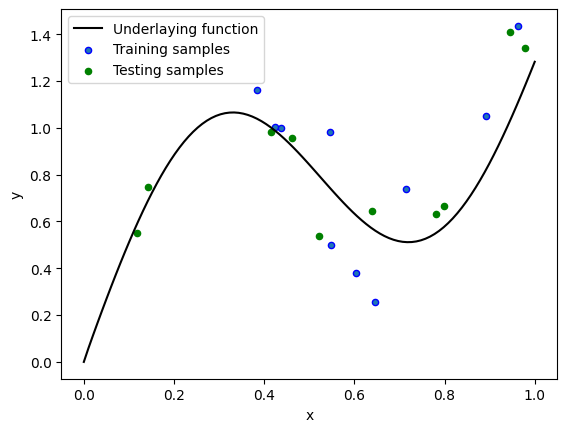

In [240]:
# Plot the data
plt.plot(X_fun, y_fun, color="k",  label="Underlaying function")
plt.xlabel("x")
plt.ylabel("y")

# Data sampling
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Training samples")
plt.scatter(X_test, y_test, edgecolor="g", color="g", s=20, label="Testing samples")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")

In [242]:
# Fit polynomial model (degree = 10)
deg = 10
poly = PolynomialFeatures(degree=deg, include_bias=False)
polynomial_features = poly.fit_transform(X_train.reshape(-1, 1))

linear_regression = LinearRegression()
linear_regression.fit(polynomial_features, y_train)

LinearRegression()

In [243]:
# Evaluate the model
y_train_pred = linear_regression.predict(polynomial_features)
MSE_train_1 = mean_squared_error(y_train, y_train_pred)
print(f'MSE training: {round(MSE_train_1, 5)}')

MSE training: 0.0


In [244]:
# Test generalization 
test_features = poly.fit_transform(X_test.reshape(-1, 1))
y_pred = linear_regression.predict(test_features)
MSE_test = mean_squared_error(y_test, y_pred)
print(f'MSE testing: {round(MSE_test, 5)}')

MSE testing: 13867580748.79138


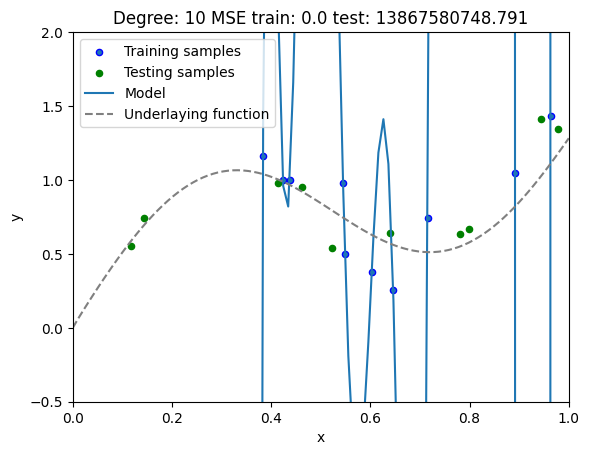

In [245]:
# Plot the model
X_plot = np.linspace(0, 1, 100)
plot_polynomial_features = poly.fit_transform(X_plot.reshape(-1, 1))
y_plot = linear_regression.predict(plot_polynomial_features)

plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Training samples")
plt.scatter(X_test, y_test, edgecolor="g", color="g", s=20, label="Testing samples")
plt.plot(X_plot, y_plot, label="Model")
plt.plot(X_fun, y_fun, color="gray", linestyle="dashed",  label="Underlaying function")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-0.5, 2))
plt.legend(loc="best")
plt.title(f"Degree: {deg} MSE train: {round(MSE_train_1, 3)} test: {round(MSE_test, 3)}")
plt.show()

### **Exercise 1:** Evaluate the infulence of the data size on model generalization
* Increse the parameter `n_samples` from 10 to 50, 100, 200, and 500
* What is the effect of training data size on its model performance while using model of higher degree than needed? 
* How importan is to have enough samples? 

In [246]:
def train_evaluate_poly(X_train, y_train, X_test, y_test, deg): 
    """Train and evaluate polynomial model"""
    
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    polynomial_features = poly.fit_transform(X_train.reshape(-1, 1))

    linear_regression = LinearRegression()
    linear_regression.fit(polynomial_features, y_train)
    
    # Evaluate the model
    y_train_pred = linear_regression.predict(polynomial_features)
    MSE_train = mean_squared_error(y_train, y_train_pred)
    print(f'MSE training: {round(MSE_train, 5)}')
    
    # Test generalization 
    test_features = poly.fit_transform(X_test.reshape(-1, 1))
    y_pred = linear_regression.predict(test_features)
    MSE_test = mean_squared_error(y_test, y_pred)
    print(f'MSE testing: {round(MSE_test, 5)}')
    
    return linear_regression, poly, MSE_train, MSE_test

In [247]:
noise_factor = 0.9
deg = 10
n_samples = 500 
X_train, y_train, X_test, y_test = train_test_data(n_samples, noise_factor)
linear_regression_, poly_, MSE_train_, MSE_test_ = train_evaluate_poly(X_train, y_train, X_test, y_test, deg)

MSE training: 0.02506
MSE testing: 0.02896


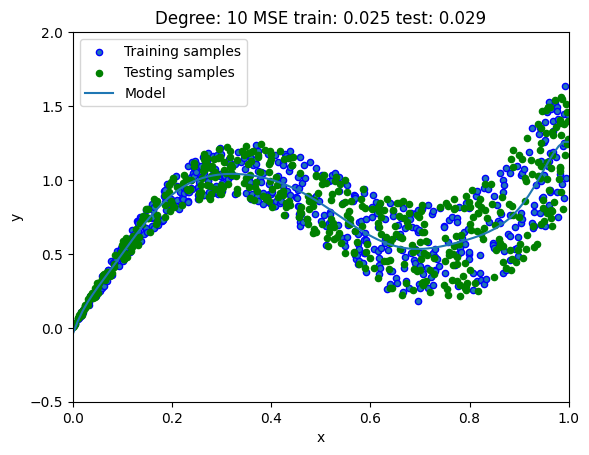

In [248]:
# Plot the model
X_plot = np.linspace(0, 1, 100)
plot_polynomial_features = poly_.fit_transform(X_plot.reshape(-1, 1))
y_plot = linear_regression_.predict(plot_polynomial_features)

plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Training samples")
plt.scatter(X_test, y_test, edgecolor="g", color="g", s=20, label="Testing samples")
plt.plot(X_plot, y_plot, label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-0.5, 2))
plt.legend(loc="best")
plt.title(f"Degree: {deg} MSE train: {round(MSE_train_, 3)} test: {round(MSE_test_, 3)}")
plt.show()

### **Exercise 2:** Evaluate the infulence of noise on the model generalization
* Decrese the noise parameter `noise_factor` from 0.9 to 0.5, and 0.1
* What is the effect of noise in the training data on model generalization? 
* Next, increase  the parameter `n_samples` from to 200 and keep `noise_factor` at 10% = 0.1. How does the model look?  

In [249]:
noise_factor = 0.1
deg = 10
n_samples = 20 
X_train, y_train, X_test, y_test = train_test_data(n_samples, noise_factor)
linear_regression_, poly_, MSE_train_, MSE_test_ = train_evaluate_poly(X_train, y_train, X_test, y_test, deg)

MSE training: 0.00019
MSE testing: 0.00127


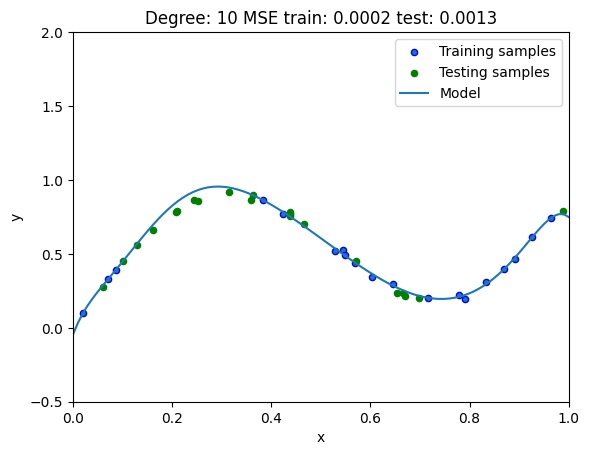

In [250]:
# Plot the model
X_plot = np.linspace(0, 1, 100)
plot_polynomial_features = poly_.fit_transform(X_plot.reshape(-1, 1))
y_plot = linear_regression_.predict(plot_polynomial_features)

plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Training samples")
plt.scatter(X_test, y_test, edgecolor="g", color="g", s=20, label="Testing samples")
plt.plot(X_plot, y_plot, label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-0.5, 2))
plt.legend(loc="best")
plt.title(f"Degree: {deg} MSE train: {round(MSE_train_, 4)} test: {round(MSE_test_, 4)}")
plt.show()

### **Exercise 3:** Simplify the model for better generalization
* Decrese the degree of polynomial of model`deg` from 10 to reasonable number, so the difference between testing and training model is minimized. 


In [278]:
noise_factor = 0.5
deg = 4
n_samples = 30 
X_train, y_train, X_test, y_test = train_test_data(n_samples, noise_factor)
linear_regression_, poly_, MSE_train_, MSE_test_ = train_evaluate_poly(X_train, y_train, X_test, y_test, deg)

MSE training: 0.00821
MSE testing: 0.00841


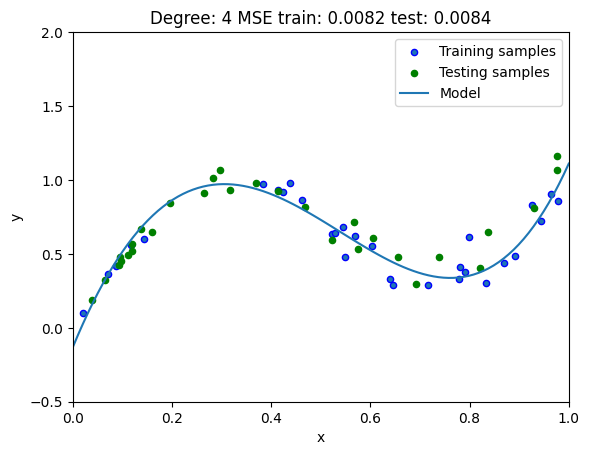

In [279]:
# Plot the model
X_plot = np.linspace(0, 1, 100)
plot_polynomial_features = poly_.fit_transform(X_plot.reshape(-1, 1))
y_plot = linear_regression_.predict(plot_polynomial_features)

plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Training samples")
plt.scatter(X_test, y_test, edgecolor="g", color="g", s=20, label="Testing samples")
plt.plot(X_plot, y_plot, label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-0.5, 2))
plt.legend(loc="best")
plt.title(f"Degree: {deg} MSE train: {round(MSE_train_, 4)} test: {round(MSE_test_, 4)}")
plt.show()